# Milestone #4: Code 

# Importing Data:
**Online sources were found in 4 areas and each has the following score/index:**  
(*As it was not possible to download a csv file with a complimentary membership, the top ranking charts were copied and pasted to excel sheets directly from the webpages.*)

- Crime = [Crime Index by City 2024 Mid-Year](https://www.numbeo.com/crime/rankings.jsp) (Numbeo)
    - Crime Index = an estimation of the overall level of crime based on the crime rate per 1,000 population for all crimes in a specific neighborhood or city
    - Safety Index = a global tool that measures the safety of cities across five areas: personal, infrastructure, health, digital, and environmental security
- Cost = [Cost of Living Index by City 2024 Mid-Year](https://www.numbeo.com/cost-of-living/rankings.jsp) (Numbeo)
    - Cost of Living Plus Rent Index
    - Groceries Index
    - Restaurant Index
- Pollution = [Pollution Index by City 2024 Mid-Year](https://www.numbeo.com/pollution/rankings.jsp) (Numbeo)
    - Pollution Index = a tool that measures the level of air pollution and the associated health concerns
- Hygiene = [Cleanest Cities in the World 2024](https://worldpopulationreview.com/world-city-rankings/cleanest-cities-in-the-world) (World Population Review)
    - Clean City Score = a number of different metrics that measure a city's cleanliness and sustainability

In [1]:
import pandas as pd

# Load an excel file and create a dataframe from each sheet
crime_sheet = pd.read_excel('DSC412_final.xlsx', sheet_name='crime-311')
cost_sheet = pd.read_excel('DSC412_final.xlsx', sheet_name='cost-218')
pollution_sheet = pd.read_excel('DSC412_final.xlsx', sheet_name='pollution-249')
hygiene_sheet = pd.read_excel('DSC412_final.xlsx', sheet_name='hygiene-50')

# Organizing Data:  
1. As there are **unneccessary indexes** included in the imported data sheets, select only the columns of indices to use from each chart. 
2. As the lists of cities are different from each other, **merge each data frame** of selected columns using common cities to avoid having missing values.
3. Since the "Hygiene" data sheet has a significantly smaller number of cities listed, compared to others, 2 consolidated data sets are created, one with the hygiene data and the other without the hygiene data, for training **2 different models**. 

In [2]:
# As there are unneccessary indices included in the data frame, select only the columns to use from each chart. 
crime = crime_sheet.loc[:, ['City','Crime Index', 'Safety Index']]
cost = cost_sheet.loc[:, ['City','Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index']]
pollution = pollution_sheet.loc[:, ['City','Pollution Index']]
hygiene = hygiene_sheet.loc[:, ['City','cleanCityScore']]

In [3]:
# Creating a single variable by mergeing each data frame of selected columns (including "hygiene").  
city4 = pd.merge(crime, cost, on='City', how='inner')
city4 = pd.merge(city4, pollution, on='City', how='inner')
city4 = pd.merge(city4, hygiene, on='City', how='inner')
city4.to_csv('city4.csv', index='City')
city4.set_index('City', inplace=True)
city4.shape

(30, 7)

In [4]:
# Creating a single variable by mergeing each data frame of selected columns (excluding "hygiene").  
city3 = pd.merge(crime, cost, on='City', how='inner')
city3 = pd.merge(city3, pollution, on='City', how='inner')
city3.to_csv('city3.csv', index='City')
city3.set_index('City', inplace=True)
city3.shape

(178, 6)

# Analyzing Data:  
The consolidated data frames were created with 30 common cities (considering "hygiene") and 178 common cities (not considering "hygiene").   

In [5]:
# Summary of index values (considering "hygiene")
city4.describe()

,Crime Index,Safety Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Pollution Index,cleanCityScore
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,44.506667,55.493333,47.710000,60.976667,54.680000,49.300000,63.757000
std,15.423782,15.423782,18.869303,19.424242,20.522089,14.600921,9.062816
min,16.300000,22.500000,19.100000,28.600000,22.500000,16.300000,47.700000
25%,30.675000,46.075000,33.600000,43.275000,37.850000,37.025000,54.082500
50%,46.950000,53.050000,46.700000,65.100000,55.950000,53.850000,66.605000
75%,53.925000,69.325000,55.825000,73.125000,66.600000,58.225000,70.415000
max,77.500000,83.700000,100.000000,100.000000,100.000000,75.200000,74.940000


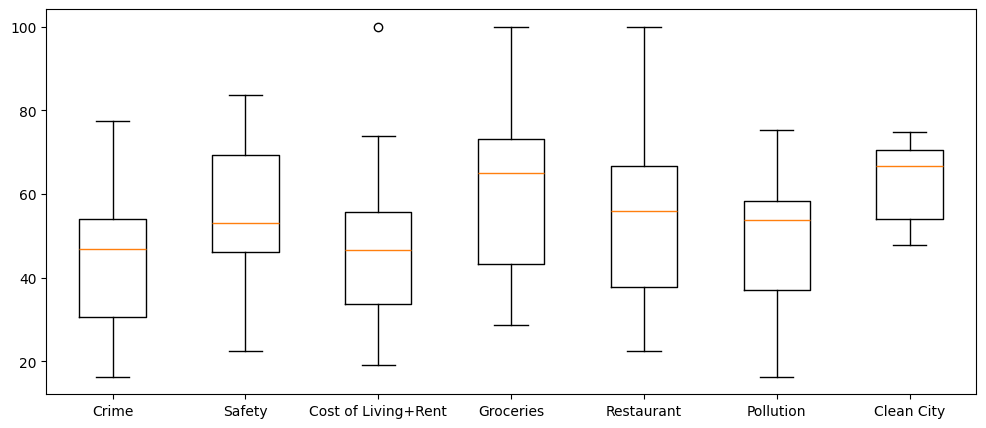

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.boxplot(city4, tick_labels=['Crime', 'Safety', 'Cost of Living+Rent', 'Groceries', 'Restaurant', 'Pollution', 'Clean City'])
plt.show()

In [7]:
# Summary of index values (not considering "hygiene")
city3.describe()

,Crime Index,Safety Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Pollution Index
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,42.315730,57.684270,38.864045,51.463483,46.317978,52.137640
std,15.083391,15.083391,18.060840,20.808749,21.835541,21.407457
min,11.800000,18.100000,11.300000,16.800000,12.300000,12.700000
25%,29.825000,46.300000,23.700000,35.525000,27.725000,32.850000
50%,41.050000,58.950000,34.100000,44.950000,40.700000,53.150000
75%,53.700000,70.175000,52.575000,67.025000,63.325000,67.925000
max,81.900000,88.200000,100.000000,111.400000,102.800000,95.700000


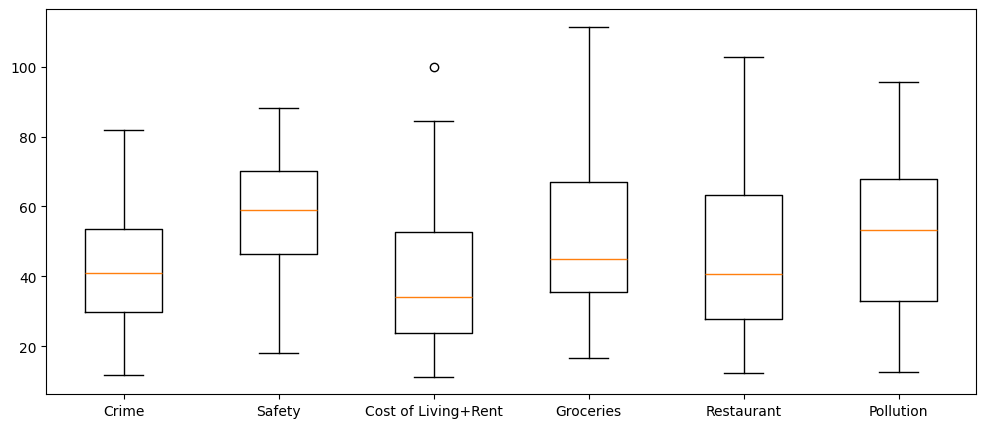

In [8]:
plt.figure(figsize=(12, 5))
plt.boxplot(city3, tick_labels=['Crime', 'Safety', 'Cost of Living+Rent', 'Groceries', 'Restaurant', 'Pollution'])
plt.show()

# Model Objects and Training (with hygiene considered):  
I wanted to use **Neural Network**, but as we did not complete learning it yet, **K-means clustering** was chosen instead.   
As an unsupervised approach is taken, I can start training a model without splitting train and test sets.  

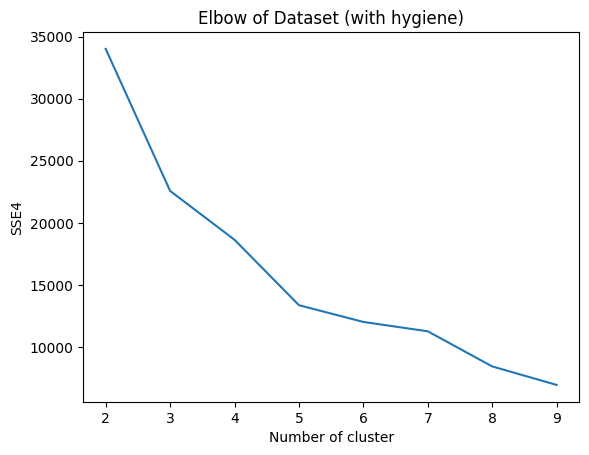

In [9]:
import numpy as np
from sklearn.cluster import KMeans

# Finding what would be the best k when "hygiene" is considered
sse4 = {}
for k in range(2, 10):
    kmeans_city4 = KMeans(n_clusters=k, random_state=0)
    kmeans_city4.fit(city4)
    sse4[k] = kmeans_city4.inertia_

plt.figure()
plt.plot(list(sse4.keys()), list(sse4.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE4")
plt.title("Elbow of Dataset (with hygiene)")
plt.show()

In [10]:
# With k=5, train a K-means clustering model:  
kmeans_city4 = KMeans(n_clusters=5)
kmeans_city4.fit(city4)
y_kmeans = kmeans_city4.predict(city4)

In [11]:
# Principal Componeent Analysis (PCA) to reduce the input dimension into 2 for visualization:  
from sklearn.decomposition import PCA
reduced_city4 = PCA(n_components=2).fit_transform(city4)
kmeans_reduced_city4 = KMeans(n_clusters=5, random_state=0)
kmeans_reduced_city4.fit(reduced_city4)
city4['Cluster'] = kmeans_reduced_city4.predict(reduced_city4)

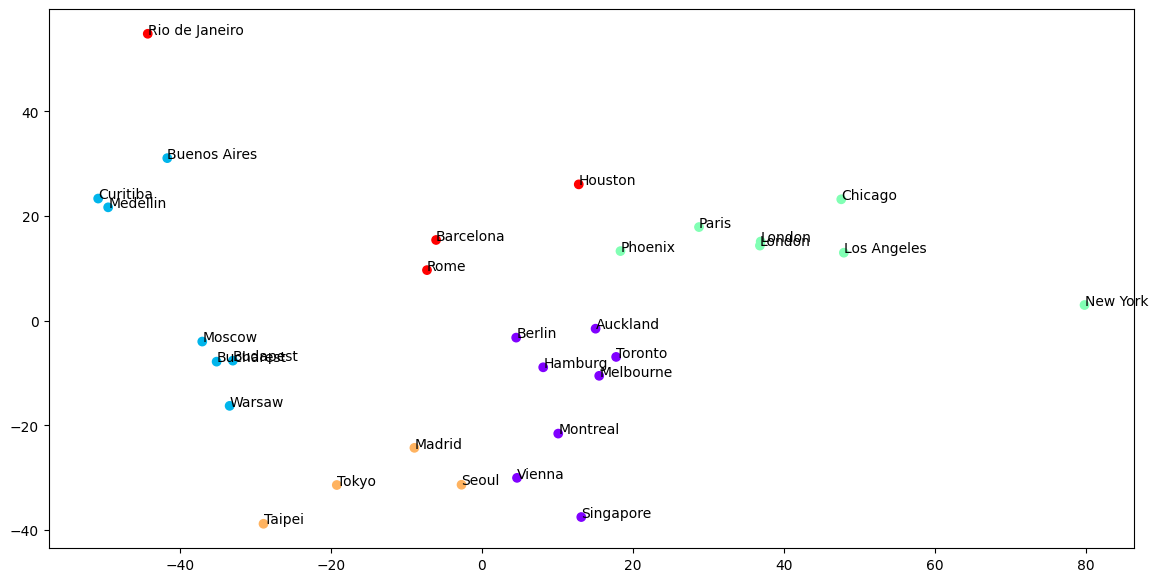

In [12]:
plt.figure(figsize=(14, 7))
plt.scatter(reduced_city4[:, 0], reduced_city4[:, 1], c=city4['Cluster'], cmap='rainbow')
for i, txt in enumerate(city4.index):
    plt.annotate(txt, (reduced_city4[i, 0], reduced_city4[i, 1]))
plt.show()

# Model Objects and Training (without hygiene considered):  

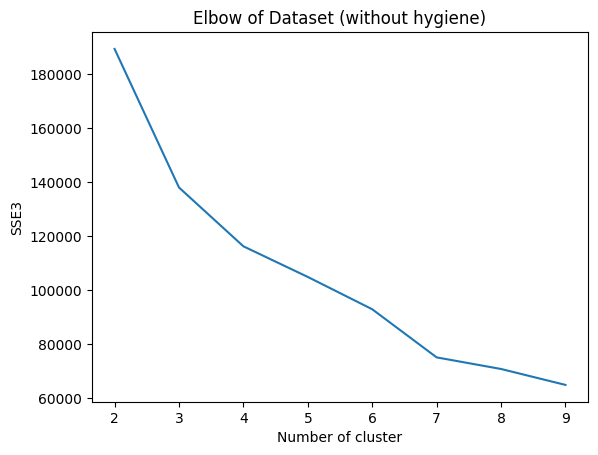

In [13]:
import numpy as np
from sklearn.cluster import KMeans

# Finding what would be the best k when "hygiene" is NOT considered
sse3 = {}
for k in range(2, 10):
    kmeans_city3 = KMeans(n_clusters=k, random_state=0)
    kmeans_city3.fit(city3)
    sse3[k] = kmeans_city3.inertia_

plt.figure()
plt.plot(list(sse3.keys()), list(sse3.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE3")
plt.title("Elbow of Dataset (without hygiene)")
plt.show()

In [14]:
# With k=7, train a K-means clustering model:  
kmeans_city3 = KMeans(n_clusters=7)
kmeans_city3.fit(city3)
y_kmeans = kmeans_city3.predict(city3)

In [15]:
# Principal Componeent Analysis (PCA) to reduce the input dimension into 2 for visualization:  
from sklearn.decomposition import PCA
reduced_city3 = PCA(n_components=2).fit_transform(city3)
kmeans_reduced_city3 = KMeans(n_clusters=7, random_state=0)
kmeans_reduced_city3.fit(reduced_city3)
city3['Cluster'] = kmeans_reduced_city3.predict(reduced_city3)

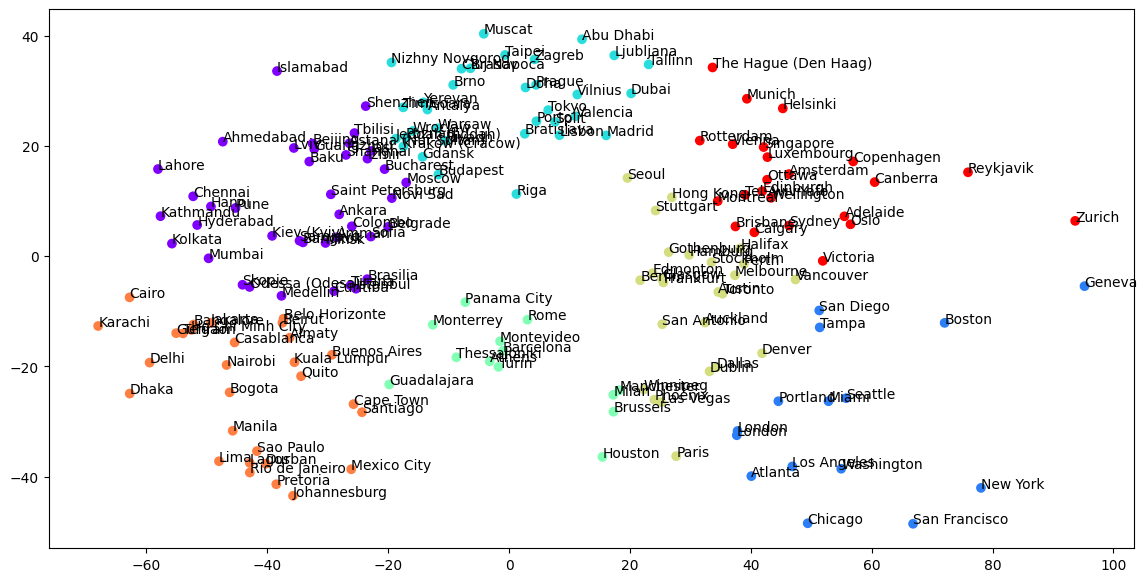

In [16]:
plt.figure(figsize=(14, 7))
plt.scatter(reduced_city3[:, 0], reduced_city3[:, 1], c=city3['Cluster'], cmap='rainbow')
for i, txt in enumerate(city3.index):
    plt.annotate(txt, (reduced_city3[i, 0], reduced_city3[i, 1]))
plt.show()

# Classification Results (with hygiene considered):
**Based on K-means clustering, 5 groups were identified by an unsupervised method.**  
Now, I wonder what charactersitics each cluster has.

In [17]:
cluster4 = city4.groupby('Cluster').agg({
    'Crime Index':'mean', 
    'Safety Index':'mean', 
    'Cost of Living Plus Rent Index':'mean', 
    'Groceries Index':'mean', 
    'Restaurant Price Index':'mean', 
    'Pollution Index':'mean', 
    'cleanCityScore':'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

mean4 = pd.DataFrame(cluster4)
mean4

,Crime Index,Safety Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Pollution Index,cleanCityScore,Count
Cluster,,,,,,,,
0,38.687500,61.312500,52.687500,69.387500,60.825000,30.862500,67.731250,8
1,43.200000,56.800000,26.600000,35.442857,34.042857,55.700000,52.808571,7
2,55.685714,44.314286,71.585714,79.514286,81.800000,59.157143,70.748571,7
3,22.925000,77.075000,40.850000,66.950000,36.850000,46.375000,63.612500,4
4,60.450000,39.550000,39.775000,50.425000,48.875000,60.650000,62.877500,4


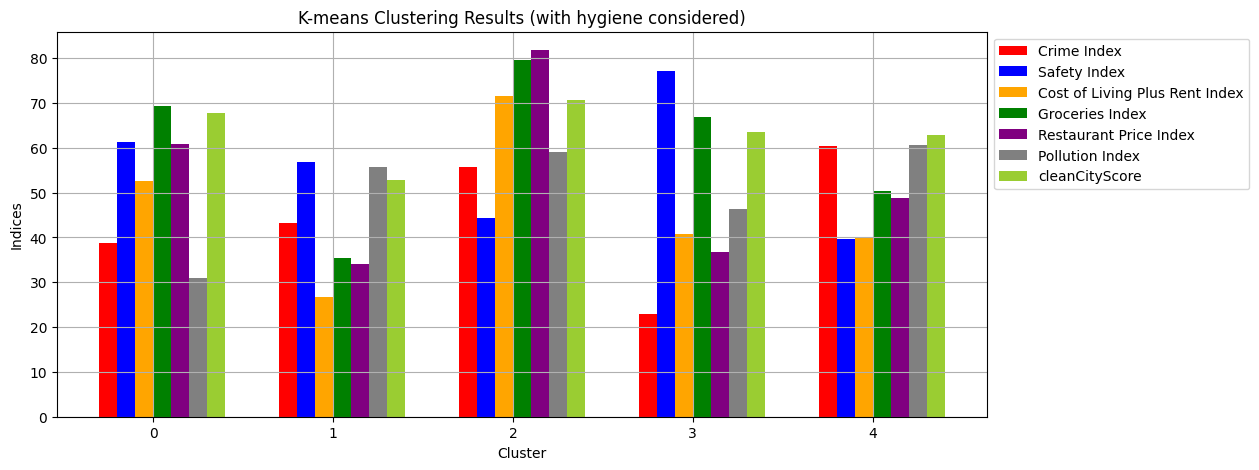

In [18]:
plt.figure(figsize=(12, 5))
plt.bar(mean4.index - 0.25, mean4['Crime Index'], 0.1, label='Crime Index', color='red')
plt.bar(mean4.index - 0.15, mean4['Safety Index'], 0.1, label='Safety Index', color='blue')
plt.bar(mean4.index - 0.05, mean4['Cost of Living Plus Rent Index'], 0.1, label='Cost of Living Plus Rent Index', color='orange')
plt.bar(mean4.index + 0.05, mean4['Groceries Index'], 0.1, label='Groceries Index', color='green')
plt.bar(mean4.index + 0.15, mean4['Restaurant Price Index'], 0.1, label='Restaurant Price Index', color='purple')
plt.bar(mean4.index + 0.25, mean4['Pollution Index'], 0.1, label='Pollution Index', color='grey')
plt.bar(mean4.index + 0.35, mean4['cleanCityScore'], 0.1, label='cleanCityScore', color='yellowgreen')
plt.title('K-means Clustering Results (with hygiene considered)')
plt.xlabel('Cluster')
plt.ylabel('Indices')
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

# Cluster Characterization (with hygiene considered):
**The characteristics of each cluster are summarized as follows:**  
- Cluster 0 = safe and clean but expensive cities (Auckland, Berlin, Melbourne, Toronto, Hamburg, Montreal, Vienna, Singapore) 
    - "Safe" with the 2nd lowest average crime index (38.69) and the 2nd highest average safety index (61.31)
    - "Clean" with the lowest average pollution index (30.86) and 2nd highest average clean city score (67.73)
    - "Expensive" with the 2nd highest average living cost index (52.69), groceries index (69.39), and restaurant index (60.83)
- Cluster 1 = affordable but dirty cities (Buenos Aire, Curitiba, Medellin, Moscow, Budapest, Bucharest, Warsaw)
    - "Affordable" wwith the lowest average living cost index (26.60), groceries index (35.44), restaurant index (34.04)
    - "Dirty" with the 2nd highest average pollution index (55.70) and the lowest average clean city score (52.81)
- Cluster 2 = clean but unsafe and expensive cities (Chicago, Paris, London, Phoenix, Los Angeles, New York) 
    - "Clean" with the highest average clean city score (70.75)
    - "Unsafe" with the 2nd highest average crime index (55.69) and the 2nd lowest average safety index (44.31)
    - "Expensive" with the highest average living cost index (71.59), groceries index (79.51), and restaurant index (81.80)
- Cluster 3 = safe and affordable cities (Madrid, Seoul, Tokyo, Taipei)
    - "Safe" with the lowest average crime index (22.93) and the highest average safety index (77.08)
    - "Affordable" with the 2nd lowest average restaurant index (36.85)
- Cluster 4 = affordable but unsafe cities (Rio de Janeiro, Houston, Barcelona, Rome)
    - "Affordable" with the lowest average living cost index (39.78) and groceries index (50.43)
    - "Unsafe" with the highest average crime index (60.45) and the lowest average safety index (39.55)

In [19]:
city4['Cluster'][city4['Cluster']==3]

City
Madrid    3
Seoul     3
Tokyo     3
Taipei    3
Name: Cluster, dtype: int32

# Classification Results (without hygiene considered):
**Based on K-means clustering, 7 groups were identified by an unsupervised method.**  
Now, I wonder what charactersitics each cluster has.

In [20]:
cluster3 = city3.groupby('Cluster').agg({
    'Crime Index':'mean', 
    'Safety Index':'mean', 
    'Cost of Living Plus Rent Index':'mean', 
    'Groceries Index':'mean', 
    'Restaurant Price Index':'mean', 
    'Pollution Index':'mean', 
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

mean3 = pd.DataFrame(cluster3)
mean3

,Crime Index,Safety Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Pollution Index,Count
Cluster,,,,,,,
0,39.390000,60.610000,22.357500,33.200000,25.747500,66.685000,40
1,52.273333,47.726667,74.106667,86.400000,82.613333,44.033333,15
2,25.527273,74.472727,34.051515,43.206061,41.512121,43.515152,33
3,53.992308,46.007692,40.876923,55.684615,54.084615,60.553846,13
4,45.116000,54.884000,52.852000,70.324000,61.916000,38.512000,25
5,63.013793,36.986207,22.444828,32.468966,25.179310,76.082759,29
6,29.256522,70.743478,55.852174,73.352174,70.626087,24.356522,23


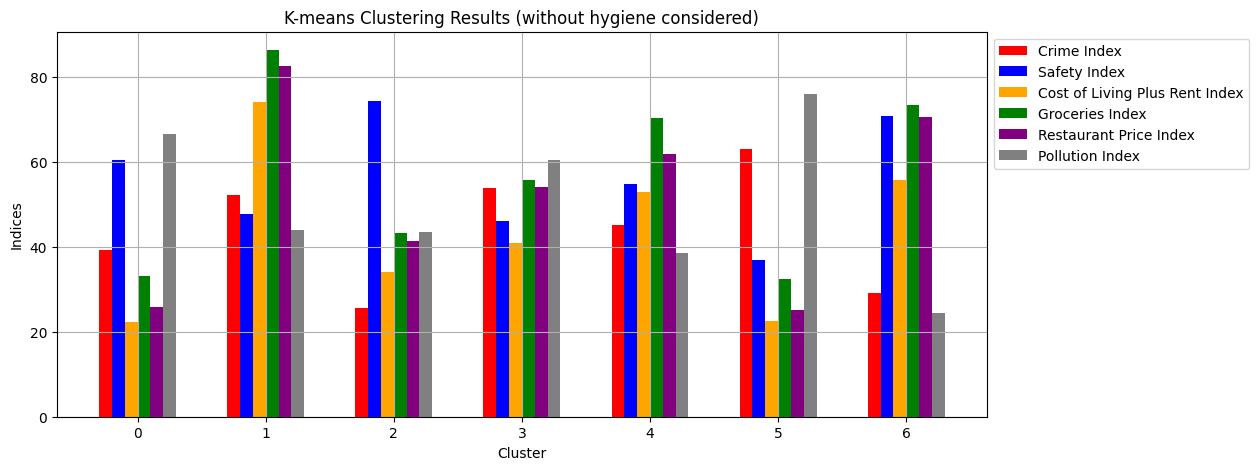

In [21]:
plt.figure(figsize=(12, 5))
plt.bar(mean3.index - 0.25, mean3['Crime Index'], 0.1, label='Crime Index', color='red')
plt.bar(mean3.index - 0.15, mean3['Safety Index'], 0.1, label='Safety Index', color='blue')
plt.bar(mean3.index - 0.05, mean3['Cost of Living Plus Rent Index'], 0.1, label='Cost of Living Plus Rent Index', color='orange')
plt.bar(mean3.index + 0.05, mean3['Groceries Index'], 0.1, label='Groceries Index', color='green')
plt.bar(mean3.index + 0.15, mean3['Restaurant Price Index'], 0.1, label='Restaurant Price Index', color='purple')
plt.bar(mean3.index + 0.25, mean3['Pollution Index'], 0.1, label='Pollution Index', color='grey')
plt.title('K-means Clustering Results (without hygiene considered)')
plt.xlabel('Cluster')
plt.ylabel('Indices')
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

# Cluster Characterization (without hygiene considered):
**The characteristics of each cluster are summarized as follows:**  
- Cluster 0 = affordable but contaminated cities  
    - "Affordable" with the lowest average living cost index (22.36), groceries index (33.20), and restaurant index (25.75)
    - "Contaminated" with the 2nd highest average pollution index (66.69)     
- Cluster 1 = expensive and unsafe cities 
    - "Expensive" wwith the highest average living cost index (74.11), groceries index (86.40), restaurant index (82.61)
    - "Unsafe" with the 3rd highest average crime index (52.27) and the 3rd lowest average safety index (47.73)
- Cluster 2 = safe and affordable cities 
    - "Safe" with the lowest average crime index (25.53) and the highest average safety index (74.47)
    - "Affordable" with the 3rd lowest average living cost index (34.05), groceries index (43.21), and restaurant index (41.51)
- Cluster 3 = unsafe cities 
    - "Unsafe" with the 2nd highest average crime index (53.99) and the 2nd lowest average safety index (46.01)
- Cluster 4 = expensive but uncontaminated cities 
    - "Expensive" with the 3rd highest average living cost index (52.85), groceries index (70.32), and restaurant index (61.92)
    - "Uncontaminated" with the 2nd lowest average pollution index (38.51)
- Cluster 5 = affordable but unsafe and contaminated cities  
    - "Affordable" with the lowest average living cost index (22.44), groceries index (32.47), and restaurant index (25.18)
    - "Unsafe" with the highest average crime index (63.01) and the lowest average safety index (36.99)
    - "Contaminated" with the highest average pollution index (76.08) 
- Cluster 6 = safe and uncontaminated but expensive cities  
    - "Safe" with the 2nd lowest average crime index (29.26) and the 2nd highest average safety index (70.74)
    - "Uncontaminated" with the lowest average pollution index (24.36)     
    - "Expensive" with the 2nd highest average living cost index (55.85), groceries index (73.35), and restaurant index (70.63)   

In [22]:
city3['Cluster'][city3['Cluster']==2]

City
Riga               2
Budapest           2
Gdansk             2
Porto              2
Split              2
Bratislava         2
Valencia           2
Lisbon             2
Antalya            2
Poznan             2
Nizhny Novgorod    2
Vilnius            2
Madrid             2
Jeddah (Jiddah)    2
Wroclaw            2
Krakow (Cracow)    2
Timisoara          2
Brno               2
Riyadh             2
Warsaw             2
Brasov             2
Prague             2
Tokyo              2
Tallinn            2
Yerevan            2
Cluj-Napoca        2
Zagreb             2
Ljubljana          2
Muscat             2
Taipei             2
Dubai              2
Doha               2
Abu Dhabi          2
Name: Cluster, dtype: int32